In [1]:
""" Initialize """

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from fuzzywuzzy import fuzz
import itertools
import numpy as np
import matplotlib.pyplot as plt

import spacy
nlp = spacy.load("en_core_web_sm")

from textblob import TextBlob
import csv

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
""" Data preprocessing """

def preprocess(data):
    data = [item.lower() for item in data]
    stop_words = set(stopwords.words('english'))
    paragraph = ' '.join(data)
    word_tokens = word_tokenize(paragraph) 
    preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
    return preprocessed_data


In [3]:
""" FuzzyWuzzy """

# use fuzzywuzzy to get string matching scores for the snippets
# variable i tells about how many snippets are considered, for each i, 10 snippets are processed
def wuzzy_string_matching(snippets):
    score_list = []
    V1 = 0
    #if i * 10 >= len(snippets):
    combs = itertools.combinations(range(0,len(snippets)),2)
    #else:
    #    combs = itertools.combinations(range(0,i*10),2)
    for id1, id2 in combs:
        #ratio = fuzz.ratio(snippets[id1], snippets[id2])
        ratio = fuzz.token_sort_ratio(snippets[id1], snippets[id2])
        # V1 corresponding to the total number of similar snippets (string matching score equals 100%)
        if ratio == 100 and snippets[id1] != "":
            V1 += 1
        score_list.append(ratio)

    # V2 for the average string matching of all pairs
    V2 = np.average(score_list)
    # V3 for the standard deviation corresponding to this average value.
    V3 = np.std(score_list)

    return V1,V2,V3

# plot string matching scores
def plot_string_matching(snippets, title):
    V1_list = []
    V2_list = []
    V3_list = []

    for i in range(9, 109, 10):
        V1, V2, V3 = wuzzy_string_matching(snippets[:i])
        V1_list.append(V1)
        V2_list.append(V2)
        V3_list.append(V3)

    x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
 
    plt.rcParams["figure.figsize"] = (15,5)
    plt.suptitle("String matching")
    plt.subplot(131)
    plt.title(title + ", similar snippets")
    plt.plot(x, V1_list)
    plt.subplot(132)
    plt.title(title + ", average score")
    plt.plot(x, V2_list)
    plt.subplot(133)
    plt.title(title + ", standard deviation")
    plt.plot(x, V3_list)
    plt.tight_layout()
    plt.show()


In [4]:
"""Spacy named entities"""

def plot_named_entities(snippets, title):
    #initialize empty list for the entities
    entities = []

    #loop for going through all snippets
    for snippet in snippets:
        doc = nlp(snippet)
        #Calculate the entities
        lista = [ent.text for ent in doc.ents]
        entities.append(" ".join(lista))    


    V1_4_list = []
    V2_4_list = []
    V3_4_list = []

    #for i in range(1, 11):
    #    V1, V2, V3 = wuzzy_string_matching(i, entities)
    #    V1_4_list.append(V1)
    #    V2_4_list.append(V2)
    #    V3_4_list.append(V3)

    for i in range(9, 109, 10):
        V1, V2, V3 = wuzzy_string_matching(entities[:i])
        V1_4_list.append(V1)
        V2_4_list.append(V2)
        V3_4_list.append(V3)

    x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

    plt.suptitle("Named entities")
    plt.subplot(131)
    plt.title(title + ", similar snippets")
    plt.plot(x, V1_4_list)
    plt.subplot(132)
    plt.title(title + ", average score")
    plt.plot(x, V2_4_list)
    plt.subplot(133)
    plt.title(title + ", standard deviation")
    plt.plot(x, V3_4_list)
    plt.tight_layout()
    plt.show()

In [5]:
""" WordCloud """

def get_word_cloud(data, title):
    wordcloud = WordCloud(width=1600, height=900, max_font_size=200, background_color="black").generate(data)
    plt.figure(figsize=(13,11))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    return plt

def show_wordcloud(snippets, title):
    plt = get_word_cloud(snippets, title)
    plt.show()



In [6]:
""" Sentiment analysis """

# perform sentiment polarity analysis for the snippet data
def sentiment_analyze(snippets, title):
    polarity = []

    for snippet in snippets:
        text_blob = TextBlob(snippet)
        snippet_score = 0
        for sentence in text_blob.sentences:
            snippet_score += (sentence.sentiment.polarity)
        polarity.append(snippet_score)

    #vector V4, average values and vector V5 std values
    V4 = []
    V5 = []
    for i in range (10,110,10):
        V4.append(np.average(polarity[0:i]))
        V5.append(np.std(polarity[0:i]))

    x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

    plt.suptitle("Sentiment polarity")
    plt.figure(1)
    plt.plot(x,V4)
    plt.title(title + ", avg values")
    plt.show()

    plt.figure(2)
    plt.plot(x,V5)
    plt.title(title + ", std values")
    plt.show()


In [7]:
def analyze(text, title):
    preprocessed_text = preprocess(text)
    plot_string_matching(text, title)
    plot_named_entities(text, title)
    show_wordcloud(preprocessed_text, title)
    sentiment_analyze(text, title)
    return

In [ ]:
""" Manually scraped Google snippets """

# Manually scraped data
# Done 06.10.2021, Oulu Finland
# URL = https://www.google.com/search?q=carbon+footprint
# Selecting next page by clicking
# Browser: Firefox (93.0, 64-bit)

with open('NLP_Carbon_Footprint_Google.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    manually_scraped_headings = []
    manually_scraped_snippets = []
    for row in csv_reader:
        manually_scraped_headings.append(row[1])
        manually_scraped_snippets.append(row[2])
    #manually_scraped_snippets = [row[2] for row in csv_reader]
    #manually_scraped_headings = [row[1] for row in csv_reader]
    #print(*manually_scraped_snippets[:15], sep='\n')
    #print(len(manually_scraped_snippets))
    # ------
    analyze(manually_scraped_snippets, 'Manual Google snippets')
    analyze(manually_scraped_headings, 'Manual Google headings')

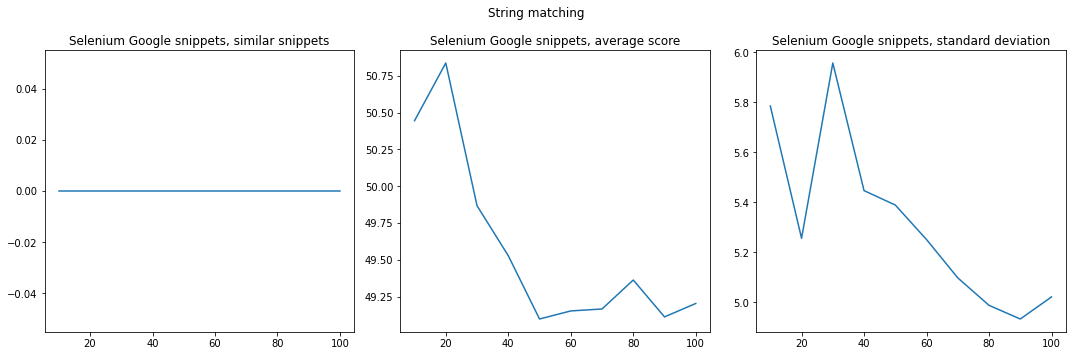

['2 under 2 tons 2050', 'Us', 'World Buildings, Cars, Flights', 'GHG Background', '14.7.2016 daily', '12.3.2018', '', 'Today', 'GHG', 'Finland', '', '', '', '', 'kirjoittanut B Goldstein 2020 37', '50–90%', 'Amazon', '', '', '', 'year', '', '', '', 'ICAO The ICAO Carbon Emissions', '', '', '', '12.1.2021', 'Black Carbon Footprint BC Footprint BC Footprint BC', '', '', 'kirjoittanut EG Hertwich 2009 1652 Article Views: 72896', '', 'Product Carbon Footprint', 'less than $2', '', 'Carbon Footprint', 'My Carbon Action', 'Annual UK 8 July 2021 13 December 2012', '', '', 'Atria', "9.4.2021 2018 the Greenhouse Gas Protocol's Corporate", '16.6.2021 Materials 32% EU 6.7 tonnes 2019', '', 'ZERO 30%', 'ICT approximately 730 million tonnes Mt CO2-eq 1.4 percent', '', '', 'Carbon Footprint Corporate Carbon Footprint', '20.5.2020', '18.1.2021 The University of Eastern Finland 2025 one', '22.4.2021', 'FREE CO2 Fight CO2 Emissions', 'L&T 1', 'Group the Greenhouse Gas GHG a Climate Action Plan', '', 'C

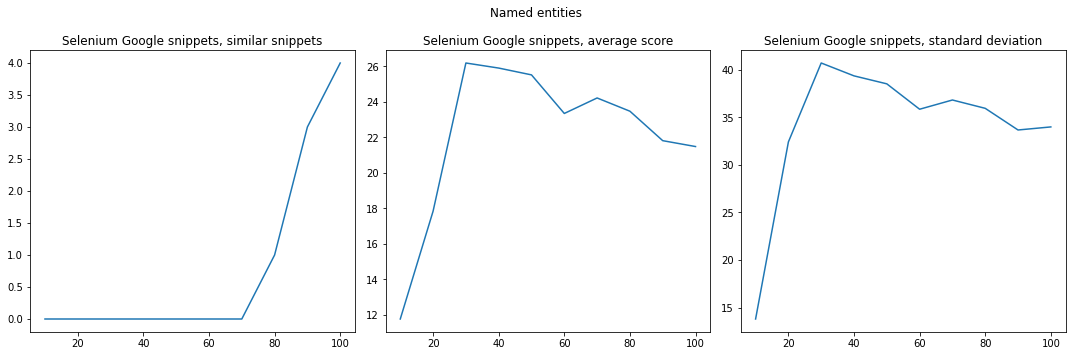

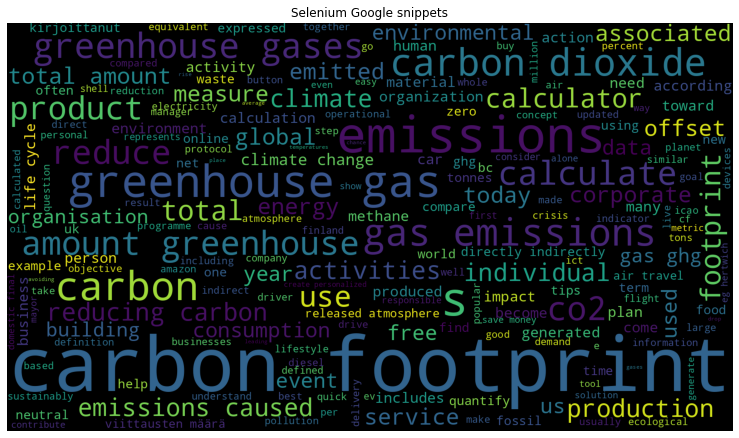

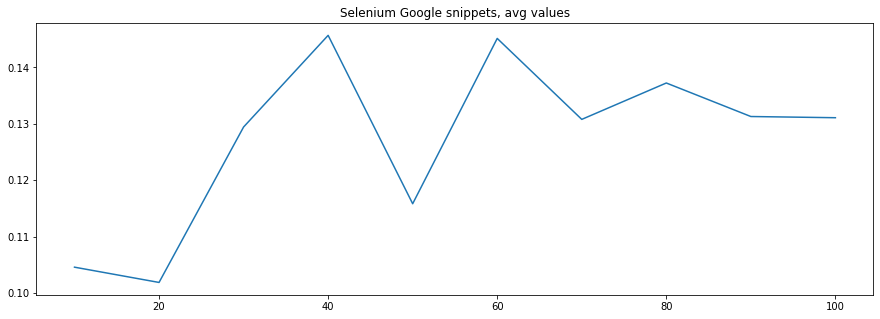

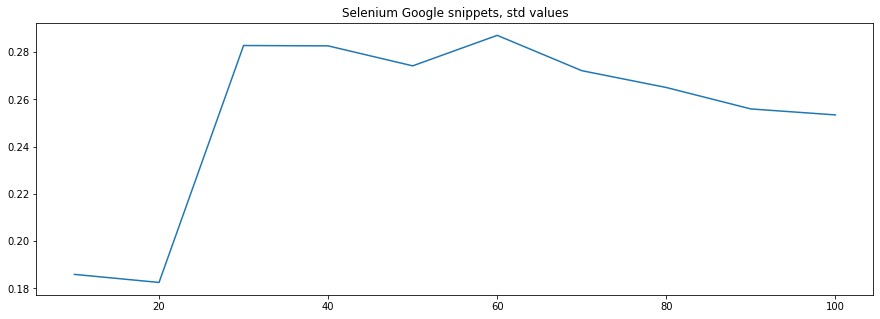

In [ ]:
""" Selenium Google scrape """

with open("google_selenium_scrape.csv") as gs_file:
    lines = gs_file.readlines()
    selenium_google_scraped_snippets = [line.rstrip() for line in lines]
    #print(*selenium_google_scraped_snippets[:15], sep='\n')
    #print(len(selenium_google_scraped_snippets))
    # ------
    analyze(manually_scraped_snippets, 'Selenium Google snippets')

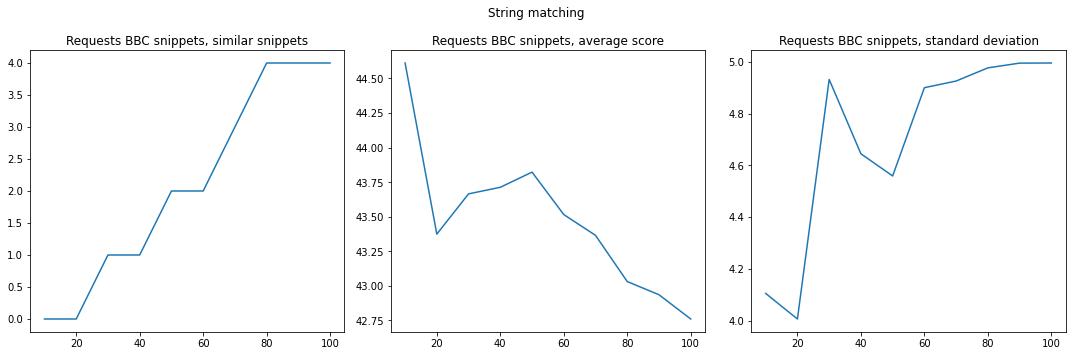

['Sam Dani Toby', '', '', "Clacton next year's", 'Dougie Nick Moray', 'Matt Baker Ellie Harrison 50th Offa Dyke Path', 'Tara Shine', 'Hayley Pearce Mother Earth', '', 'Newcastle', '', '', 'Sam Neil', '', 'UK half', '', 'Mike Berners-Lee Lucy Siegle', '6 Minute English MAP', 'Kevin Bentley Essex 128,000', 'Budweiser Wales zero 2024', '', 'Two', '', '', 'BBC Chris Morris three', '', 'Prince Charles', 'The University of Sheffield 87,000 a year', 'Prince Charles', 'BBC Chris Morris three', 'Dorset', 'Coldplay', '', 'David Smith', 'Williams 2030', 'thousands', 'Glasgow City Council', 'AI Sam Neil', 'Chris Martin', '', '', '', 'European', 'Maidstone', 'Chris Smith the Naked Scientists', 'Wales BBC', 'this year', 'BBC Click Paul Carter this week', '2030', '', 'UK', 'German', 'UK', 'England', '', '', '', '', '', '', '', '', 'England', 'zero the 21st Century', 'BBC Matt Treacy three', 'Christmas', '', '', '', 'Democrat Christine Jardine', 'Covid', '', 'Seven England', 'NI GB', '', 'Hethel', 'Bi

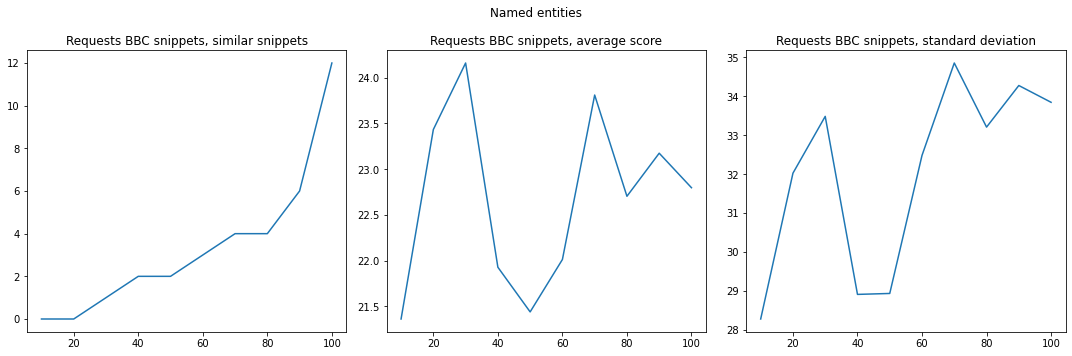

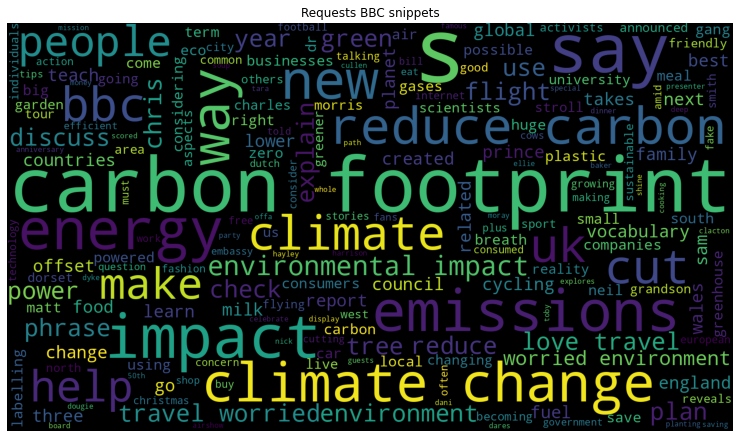

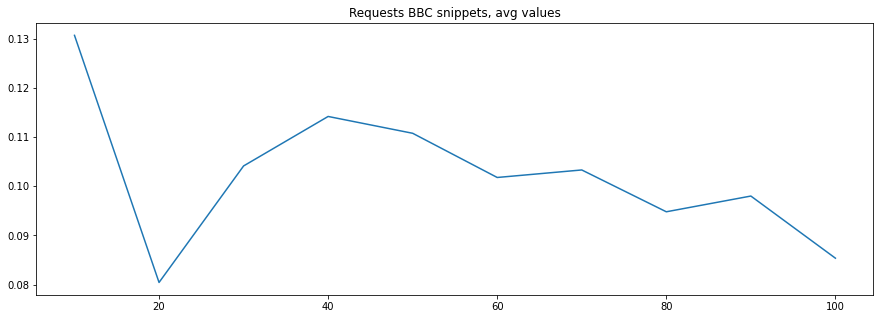

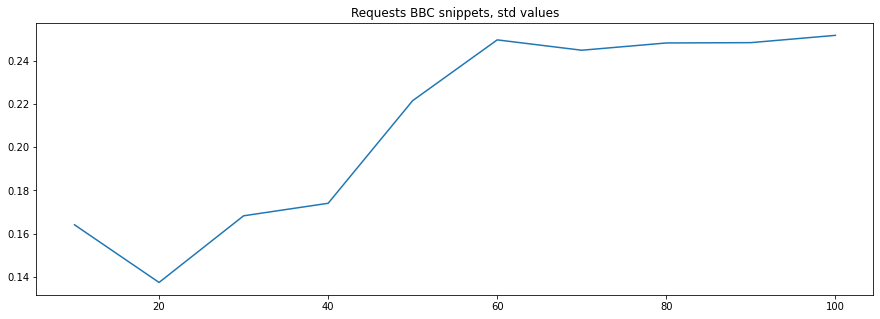

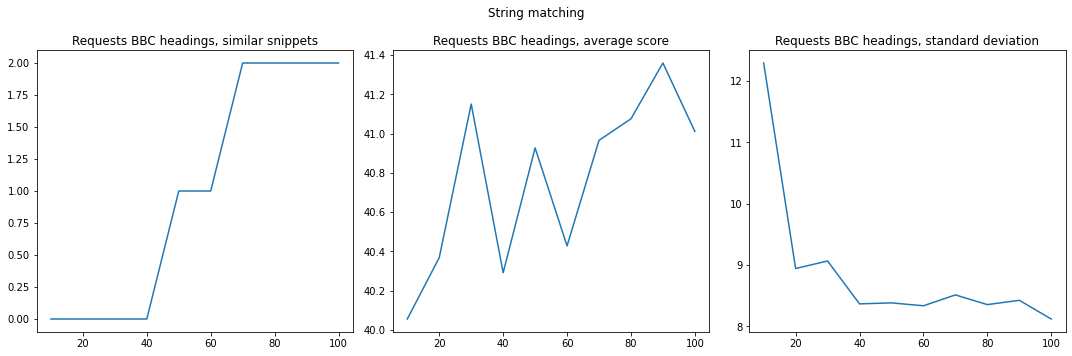

['Dani 1', '2021 Feast', '1', 'Clacton', '2021 18', 'Offa Dyke Path', 'Royal Institution 2020 Air', '2', '1 1', 'Newcastle', '', '', '', '', '19/08/21 Yorkshire', '', 'PM Highlights', '6 Minute English MAP', 'Essex County Council', 'UK first', '', '', '', 'Cornish', '', '1 3', '', 'University of Sheffield', '', '', '1,000', 'Coldplay', '', 'Jon Smith David Smith (03/10/2021', '1 Williams 2030', 'Shrewsbury', 'Glasgow', '', '', 'The Life Scientific: Sarah Bridle', 'Five', 'Five', 'European', '', '5', '', '2021', 'Google zero', 'Google zero', 'Chris Goreham', 'UK', 'Berlin', '', '', '', '', '10', 'Today 20,000', 'The Climate Question: Will', '', '', '', '', 'The Lynette Fay Show the 21st Century', '', 'Christmas', 'Great Glen', '', 'English', 'Christine Jardine', 'NHS', 'English', '', 'NI', 'Poorer', 'Anthony Isaacs', 'Today', 'World Radio Day &', '', 'Today', 'NFT $680m', 'The Bottom Line: Carbon', '', '', '', 'Tottenham Chelsea first zero', 'Devon', '', 'Netherlands', 'Learning English

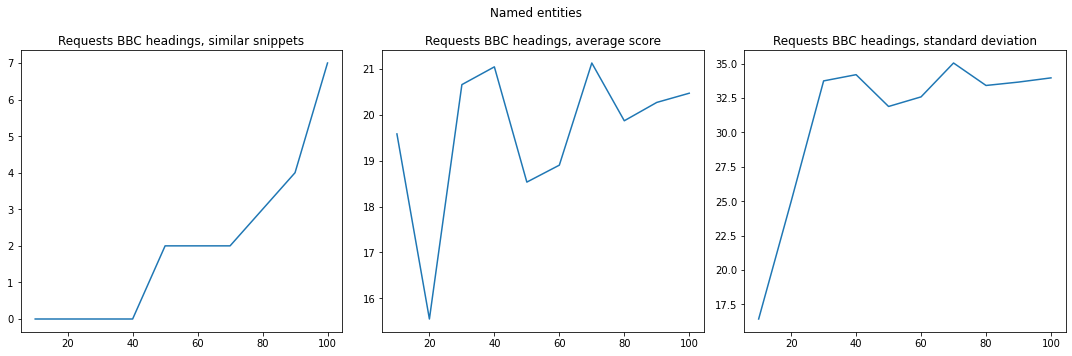

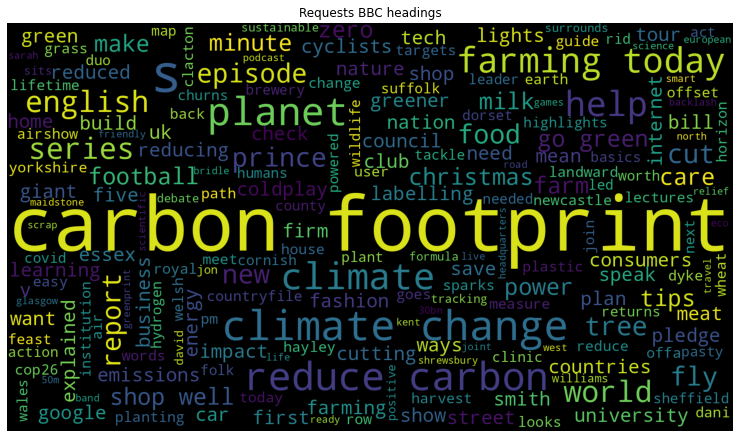

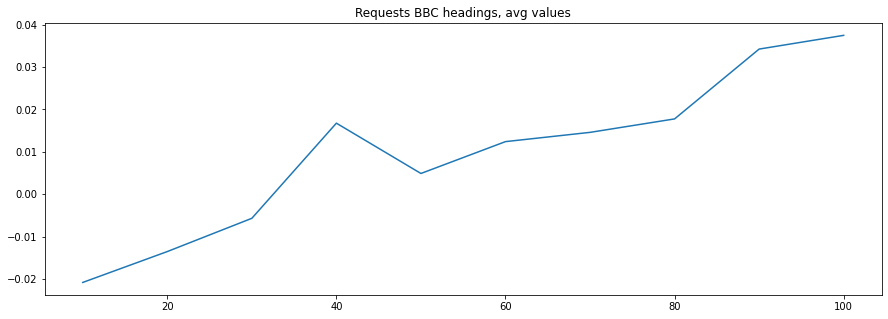

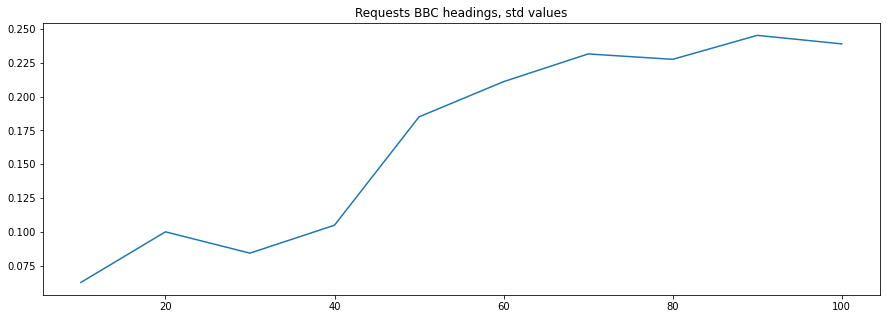

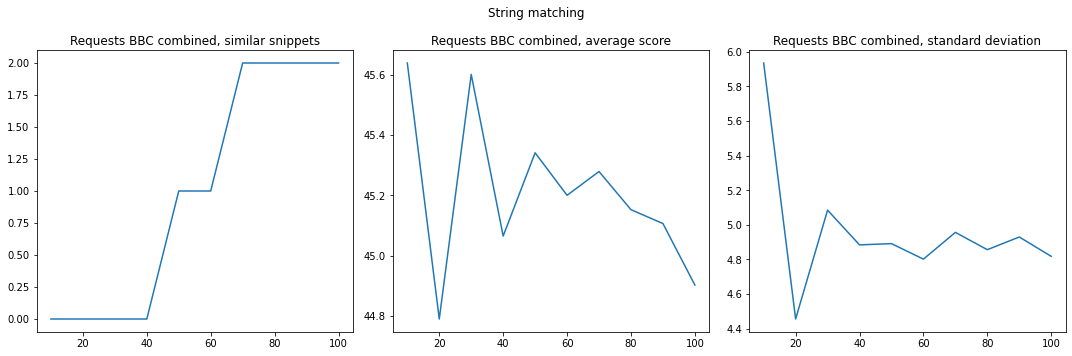

['Dani 1 Green Sam Dani Toby', '2021 Feast', '1', "Clacton Clacton next year's", '2021 18 Dougie Nick Moray', 'Offa Dyke Path Matt Baker Ellie Harrison 50th Offa Dyke Path', 'Royal Institution 2020 Tara Shine', '2 Hayley Pearce Mother Earth', '1', 'Newcastle Newcastle', '', '', 'Sam Neil', '', '19/08/21 UK half', '', 'PM Highlights Mike Berners-Lee Lucy Siegle', '6 Minute English MAP 6 Minute English MAP', 'Essex County Council Kevin Bentley Essex 128,000', 'UK first Budweiser Wales zero 2024', '', 'Two', '', 'Cornish', 'BBC Chris Morris three', '1', 'Prince Charles', 'University of Sheffield The University of Sheffield 87,000 a year', 'Prince Charles', 'BBC Chris Morris three', '1,000 Dorset', 'Coldplay Coldplay', '', 'Jon Smith David Smith David Smith', '1 Williams 2030 Williams 2030', 'Shrewsbury thousands', 'Glasgow Glasgow City Council', 'AI Sam Neil', 'Chris Martin', 'The Life Scientific: Sarah Bridle', 'Five', 'Five', 'European European', 'Maidstone', '5 Chris Smith the Naked Sc

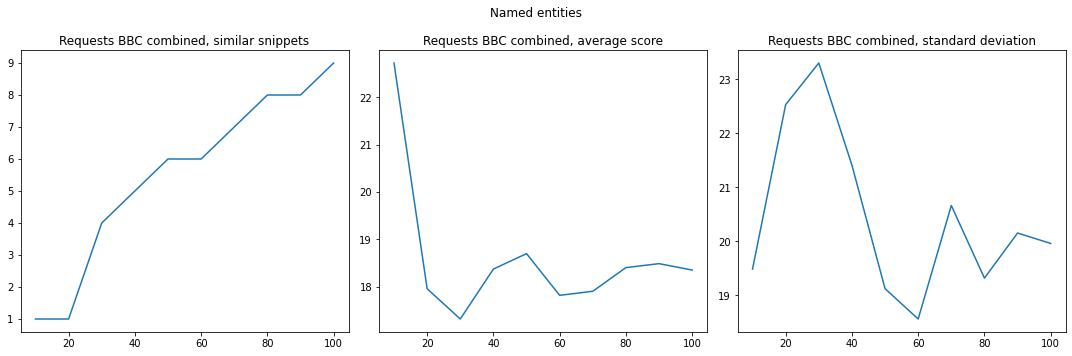

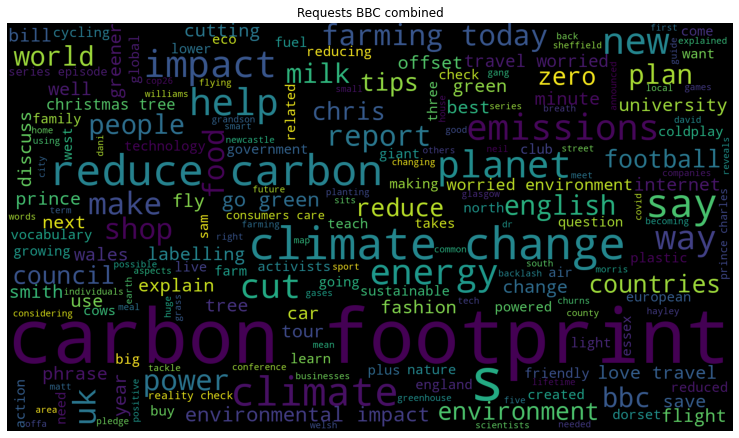

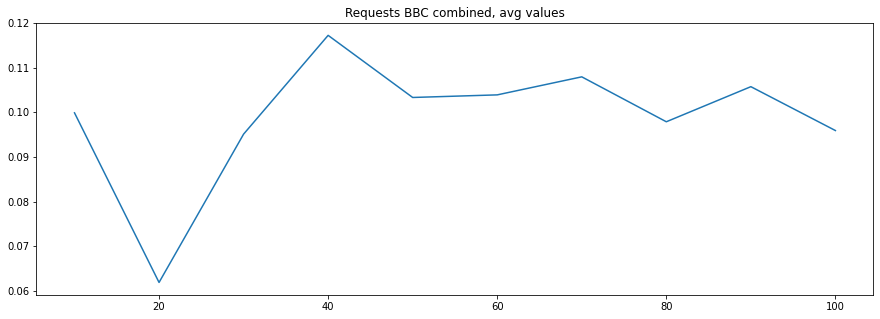

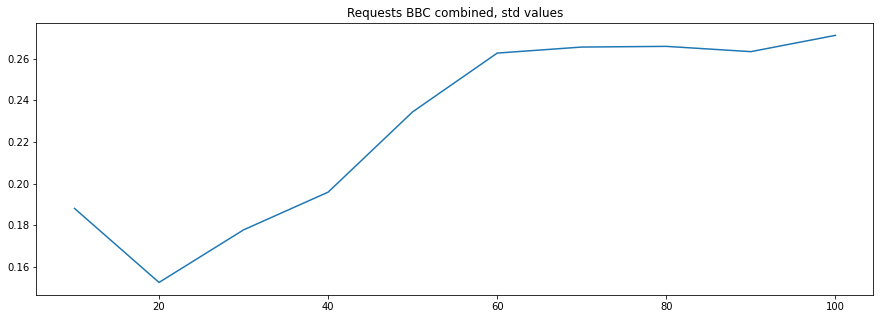

In [ ]:
""" Requests BBC scrape """

with open("bbc_requests_snippets_scrape.csv") as s_file:
    lines = s_file.readlines()
    requests_bbc_scraped_snippets = [line.rstrip() for line in lines]
    #print(*requests_bbc_scraped_snippets[:15], sep='\n')
    #print(len(requests_bbc_scraped_snippets))
    # ------
    analyze(requests_bbc_scraped_snippets, 'Requests BBC snippets')

with open("bbc_requests_headings_scrape.csv") as s_file:
    lines = s_file.readlines()
    requests_bbc_scraped_headings = [line.rstrip() for line in lines]
    #print(*requests_bbc_scraped_headings[:15], sep='\n')
    #print(len(requests_bbc_scraped_headings))
    # ------
    analyze(requests_bbc_scraped_headings, 'Requests BBC headings')

combined_bbc = [' '.join(map(str, i)) for i in zip(requests_bbc_scraped_headings, requests_bbc_scraped_snippets)]
analyze(combined_bbc, 'Requests BBC combined')

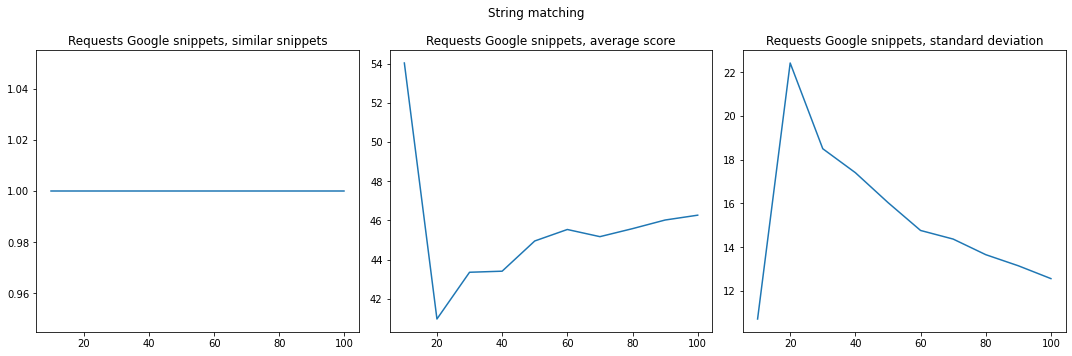

['', '', '', 'GHG', 'Footprint 60 percent Ecological Footprint Footprint', 'daily', '', 'GHG', '', '', '', '', 'Wikipedia', '', 'World Buildings, Cars, Flights', '', '', 'less than $2', '', 'Amazon', '', '', '', 'more than half', 'ICAO The ICAO Carbon Emissions', '', '', 'City over 130', '', '', '', 'Sustainability Illustrated', '', '', '', '', '', '', '8%', 'Lee New Greenhouse Gas Emissions Reduction Milestone California Air', 'BASF three 1', '', '', '', '', 'ICT approximately 730 million tonnes Mt CO2-eq 1.4 percent', 'US', '', '', 'annual about 51bn tonnes more than 40', 'zero first', '', '', 'Amazon 19% 2020', '', 'One', '', 'Amazon', '', 'between 22 and 22.9 million metric tons', '', 'the Paris Agreement Shell Net Carbon Footprint', '', '', '', '', '', 'Microsoft', 'PCF', 'Google Search', '', 'NFT', '', 'A few years BP MIT', '50,000 pounds American', 'year', '', '', 'Household Carbon Footprint Calculator', 'GHG UK', '', 'GHG', '1 5 2 3', 'Carbon Footprint GHG', '', 'The Carbon Foo

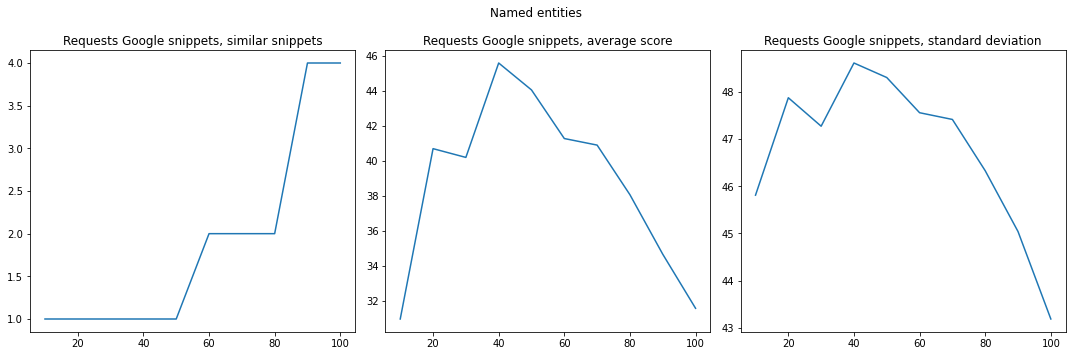

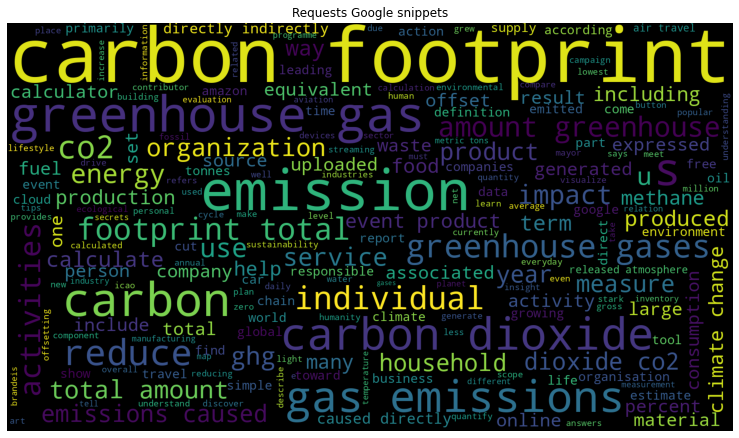

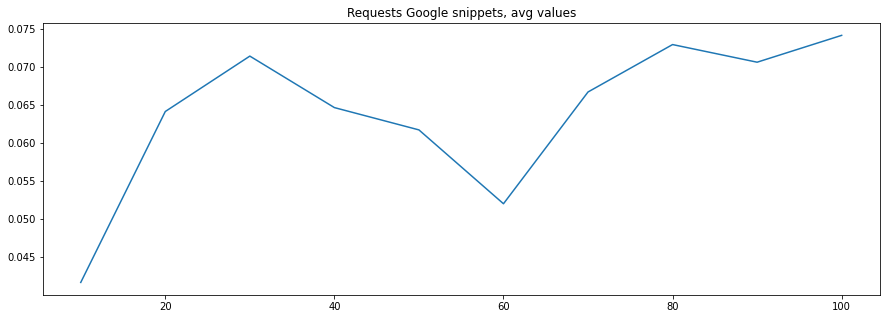

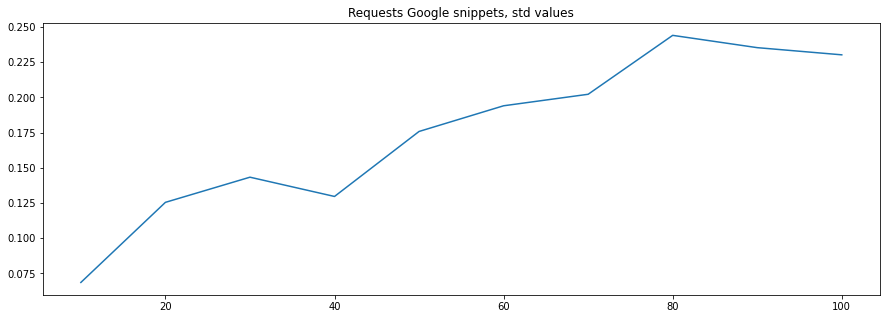

In [ ]:
""" Requests Google scrape """

with open("google_requests_scrape.csv") as s_file:
    lines = s_file.readlines()
    requests_google_scraped_snippets = [line.rstrip() for line in lines]
    #print(*requests_google_scraped_snippets[:15], sep='\n')
    #print(len(requests_google_scraped_snippets))
    # ------
    analyze(requests_google_scraped_snippets, 'Requests Google snippets')

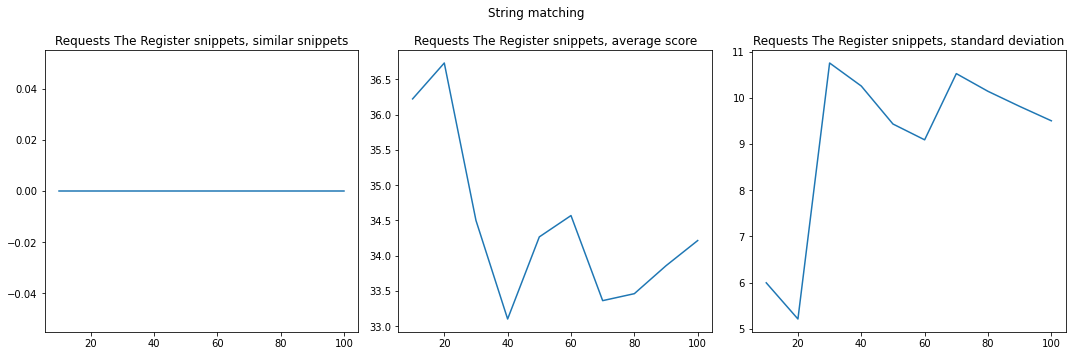

['', '', 'Energy Star', '1975', 'Power BI Pro', '21', 'over 250 Microsoft', '', 'Indian', '', 'iGiant', 'Microsoft', 'ART+COM', 'Mozilla Apple register', '', '', '', '', '', 'Google', '', '', 'Jeff Bezos Amazon Prime Video', 'four', 'Westminster', '', 'Canalys Channels Forum Bossman', 'Stockholm', 'National Australia Bank', '', '', '', '', '', '', '', '', 'Round Rock', 'Atlas Dynamics', '', '', '', '', '100+ bit barns', 'Big Blue', 'wolf', '', '', 'Washington', "Commonwealth Office's 4-year ICT", '', '', '', '', '', '', 'British 9,000', '', '', '3 Simon', 'NASA', 'Earth Goddess', '', '', 'VLN', '', '', '', '', '50%', 'the 21st Century', '', '', 'Iowa', '', '', '', '', '', '', '', '', '', '', '1', 'Marijuana', '', 'Norks South', 'Watt', 'Asst Sec', 'Office one $9.8m', '', '', '', '', '4 June 2012', 'Dell', '', 'INFOGRAPHIC', '']


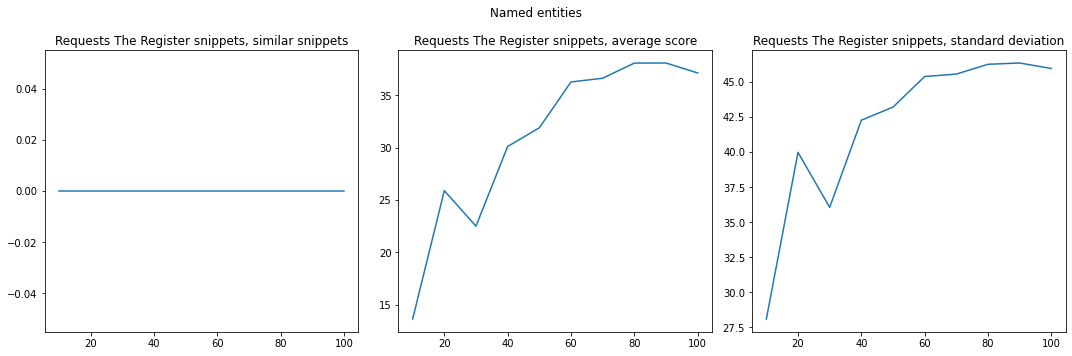

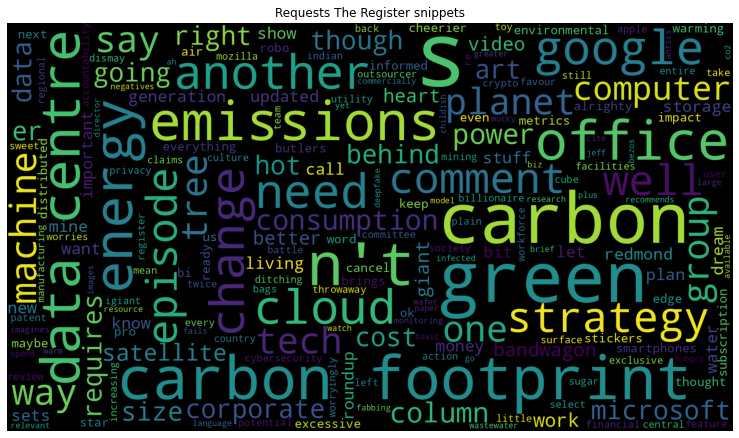

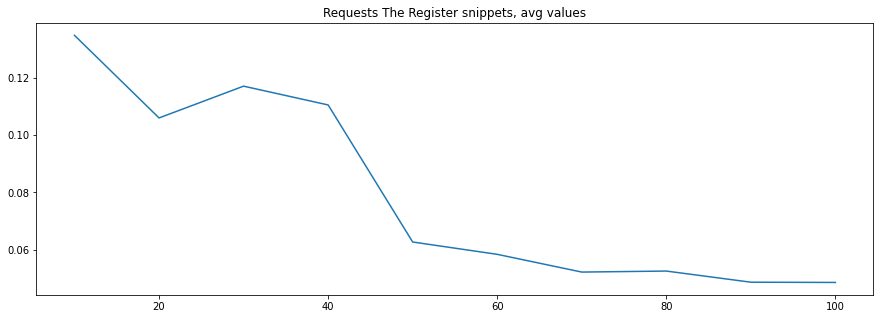

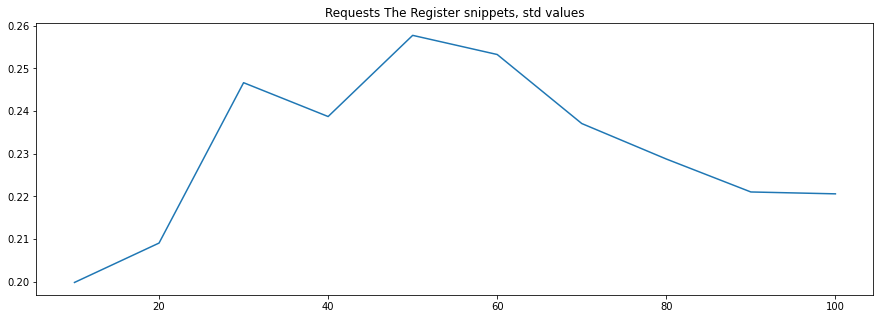

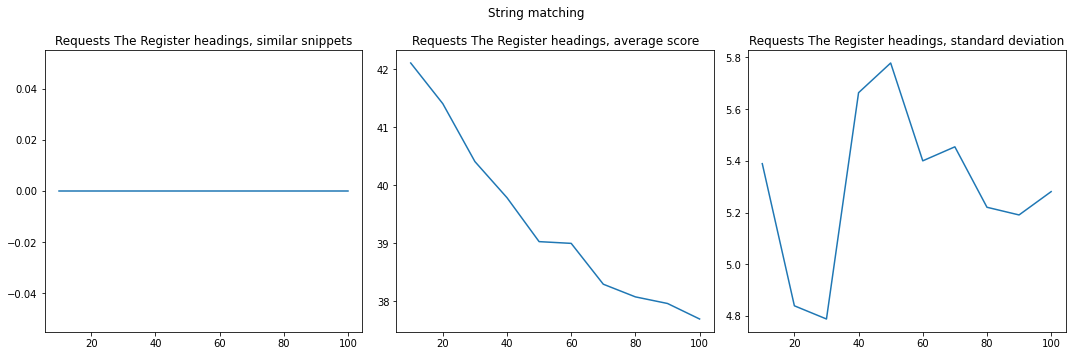

['Amazon 19% last year', '', 'GPT-3', 'Microsoft 2030', 'Microsoft', '', 'Japan NTT Group 320,000', '', 'Wipro $44.5m UK National Grid', "Green' Apple:", 'Apple', 'Bill Gates', 'one', 'Chrome 94', 'AI', 'Fujitsu', 'Xiaomi under 20 minutes', 'NHS', 'SK Hynix 1bn', 'More than 1,000 AI', '', 'BOFH', 'Amazon', 'Scotland', 'British 5', '', 'HP', 'Bork', 'Australian', '', 'M&S', 'VIA', '', '', '', 'ML', 'EC', 'Dell', 'Another day', '', 'German', 'BOFH', 'Amazon US AI YouTube', 'Microsoft', '2009 IBM 2017 IBM', 'Steve Jobs', 'some decades AI', '', 'US', 'FCO one-third', '', 'Another week', 'Dubai', 'Schmidt', 'Hitachi HIG', 'Toshiba', '', 'Dutch', '', 'BOFH PFY Scottish', 'Earth', '', '', 'First', '', 'IBM Zurich', 'AMD Dell', 'UK', '', 'UK 3-5 degree 2100', '', '', 'Norfolk first', '$677m', 'Britain', 'Ofcom annual', '', 'Skype', '1.5bn', '', '', '', 'HP', 'Sadville', 'Apple billions', '', 'HP a quarter', 'LG Samsung 55', '', '', 'EPA Microsoft', 'BT', '', 'Brazilian Amazon', '', 'EU €9.5m',

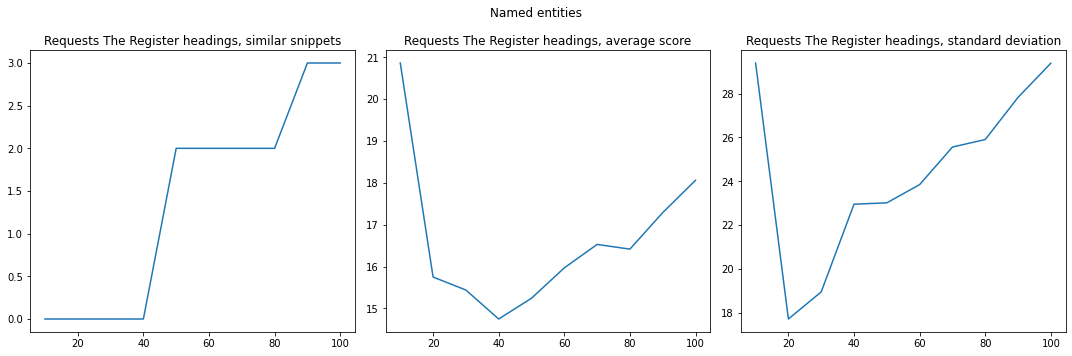

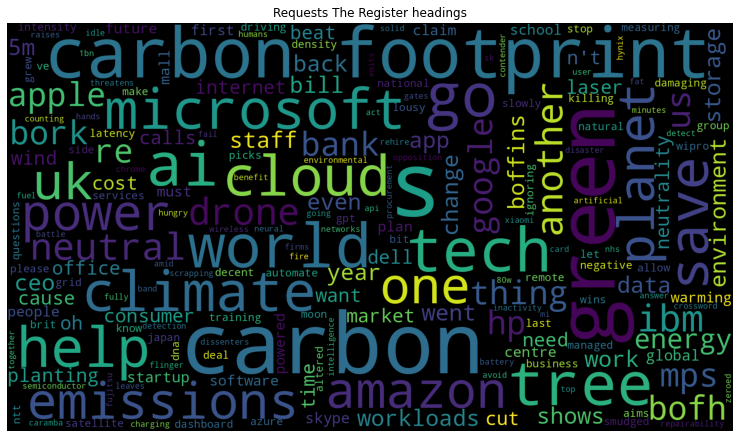

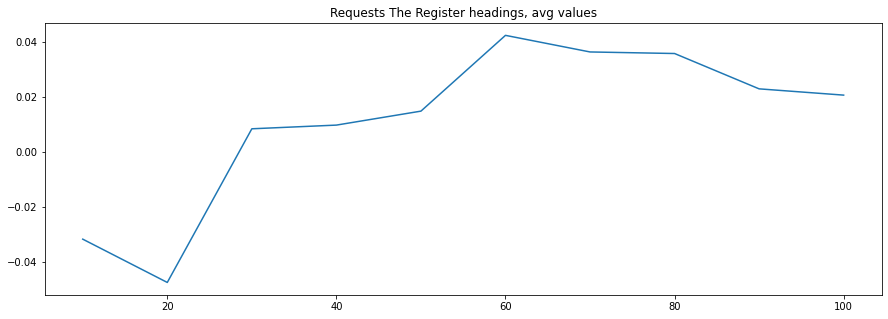

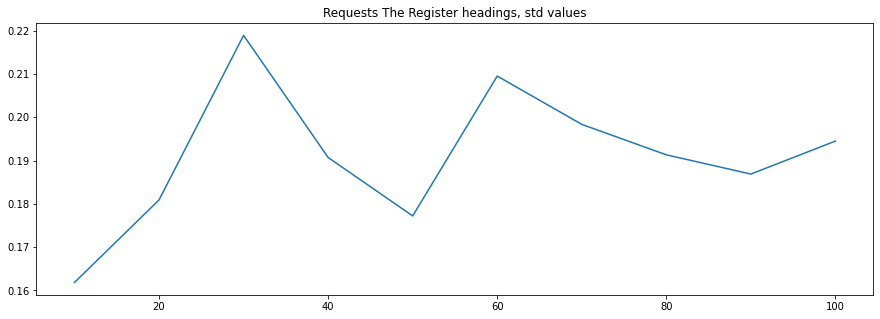

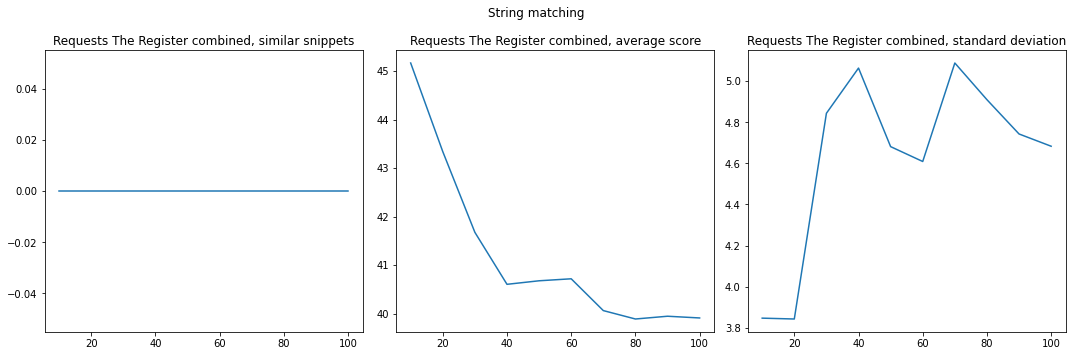

['Amazon 19% last year Alrighty', 'Column Smartphones', 'GPT-3 Energy Star', 'Microsoft 2030 1975', 'Microsoft Power BI Pro', '21', 'Japan NTT Group 320,000 over 250 Microsoft', '', 'Wipro $44.5m UK National Grid Indian', "Green' Apple:", 'Apple iGiant', 'Bill Gates Microsoft', 'one ART+COM', 'Chrome 94 Mozilla Apple register', 'AI', 'Fujitsu Exclusive Going', 'Xiaomi under 20 minutes', 'NHS', 'SK Hynix 1bn', 'More than 1,000 AI Google', '', 'BOFH 11', 'Amazon Jeff Bezos Amazon Prime Video', 'Scotland Drones four', 'British 5 Westminster', '', 'HP Canalys Channels Forum Bossman', 'Bork Stockholm', 'Australian National Australia Bank', '', 'M&S Hugs', 'VIA', '', '', '', 'ML', 'EC Making', 'Dell Round Rock', 'Another day Atlas Dynamics', '', 'German Trusty', 'BOFH Episode 4', 'Amazon US AI', 'Microsoft 100+ bit barns', '2009 IBM 2017 IBM Big Blue', 'Steve Jobs Radbot Group wolf', 'some decades AI Opinion Vendors', '', 'US Washington', "FCO one-third Foreign and Commonwealth Office's 4-ye

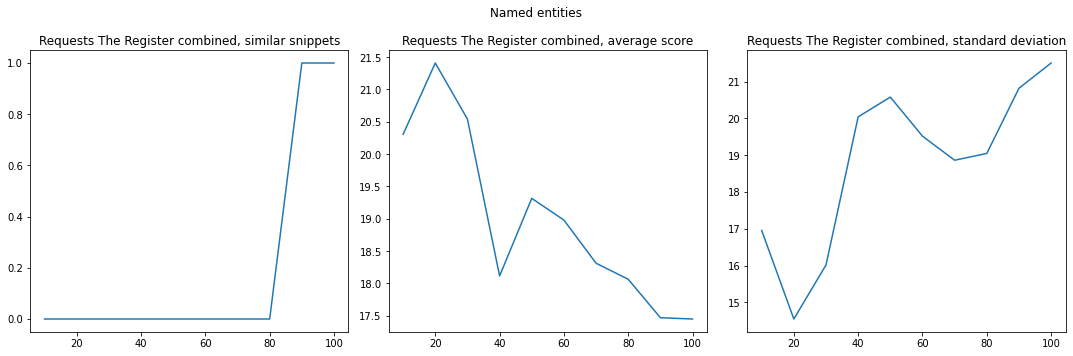

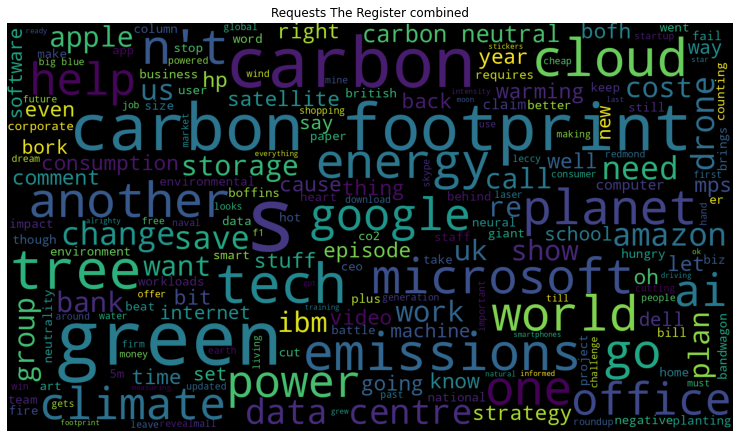

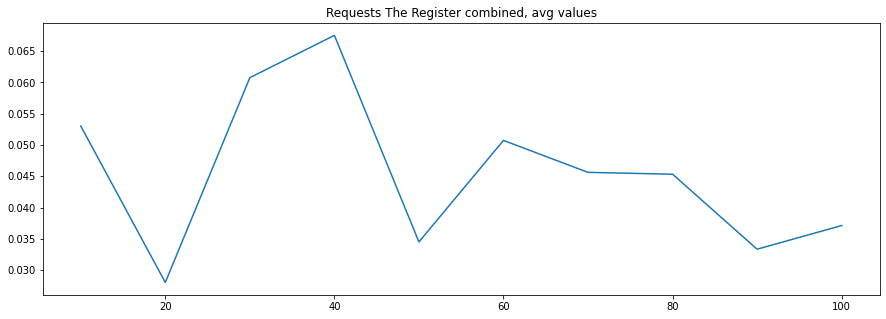

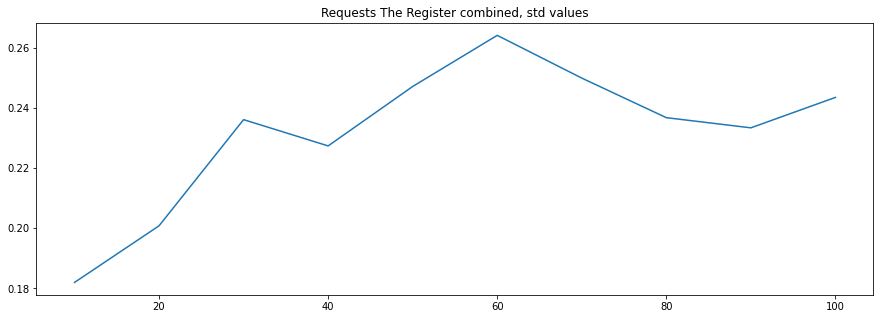

In [ ]:
""" Requests The Register scrape """

with open("register_requests_snippets_scrape.csv") as s_file:
    lines = s_file.readlines()
    requests_register_scraped_snippets = [line.rstrip() for line in lines]
    #print(*requests_register_scraped_snippets[:15], sep='\n')
    #print(len(requests_register_scraped_snippets))
    # ------
    analyze(requests_register_scraped_snippets, 'Requests The Register snippets')

with open("register_requests_headings_scrape.csv") as s_file:
    lines = s_file.readlines()
    requests_register_scraped_headings = [line.rstrip() for line in lines]
    #print(*requests_register_scraped_headings[:15], sep='\n')
    #print(len(requests_register_scraped_headings))
    # ------
    analyze(requests_register_scraped_headings, 'Requests The Register headings')

combined_bbc = [' '.join(map(str, i)) for i in zip(requests_register_scraped_headings, requests_register_scraped_snippets)]
analyze(combined_bbc, 'Requests The Register combined')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df8df42c-8503-4bb3-8c9d-497cf36bf82c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>